In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("hotel_bookings.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           7324 non-null   object 
 1   is_canceled                     7324 non-null   int64  
 2   lead_time                       7324 non-null   int64  
 3   arrival_date_year               7324 non-null   int64  
 4   arrival_date_month              7324 non-null   object 
 5   arrival_date_week_number        7323 non-null   float64
 6   arrival_date_day_of_month       7323 non-null   float64
 7   stays_in_weekend_nights         7323 non-null   float64
 8   stays_in_week_nights            7323 non-null   float64
 9   adults                          7323 non-null   float64
 10  children                        7323 non-null   float64
 11  babies                          7323 non-null   float64
 12  meal                            73

In [6]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             1
arrival_date_day_of_month            1
stays_in_weekend_nights              1
stays_in_week_nights                 1
adults                               1
children                             1
babies                               1
meal                                 1
country                              4
market_segment                       1
distribution_channel                 1
is_repeated_guest                    1
previous_cancellations               1
previous_bookings_not_canceled       1
reserved_room_type                   1
assigned_room_type                   1
booking_changes                      1
deposit_type                         1
agent                             1157
company                           6919
days_in_waiting_list     

In [9]:
average_children = round(df["children"].mean())


In [10]:
df["children"] = df["children"].fillna(value=average_children)

In [11]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             1
arrival_date_day_of_month            1
stays_in_weekend_nights              1
stays_in_week_nights                 1
adults                               1
children                             0
babies                               1
meal                                 1
country                              4
market_segment                       1
distribution_channel                 1
is_repeated_guest                    1
previous_cancellations               1
previous_bookings_not_canceled       1
reserved_room_type                   1
assigned_room_type                   1
booking_changes                      1
deposit_type                         1
agent                             1157
company                           6919
days_in_waiting_list     

In [12]:
df.shape

(7324, 32)

In [13]:
df["country"].value_counts().head(10)

PRT    4617
GBR     779
ESP     670
DEU     272
IRL     253
FRA     135
POL      73
NLD      70
CN       46
USA      44
Name: country, dtype: int64

In [14]:
df["country"] = df["country"].fillna(value="PRT")

In [15]:
df.drop(["company"], axis = 1, inplace = True)
df.drop(["agent"], axis = 1, inplace = True)

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          1
arrival_date_day_of_month         1
stays_in_weekend_nights           1
stays_in_week_nights              1
adults                            1
children                          0
babies                            1
meal                              1
country                           0
market_segment                    1
distribution_channel              1
is_repeated_guest                 1
previous_cancellations            1
previous_bookings_not_canceled    1
reserved_room_type                1
assigned_room_type                1
booking_changes                   1
deposit_type                      1
days_in_waiting_list              1
customer_type                     1
adr                               1
required_car_parking_spaces       1
total_of_special_requests   

Text(0, 0.5, 'Number of Hotels')

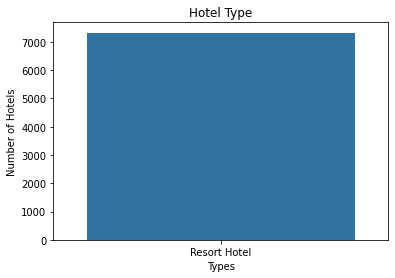

In [19]:
sns.countplot(x="hotel", data=df)
plt.title("Hotel Type")
plt.xlabel("Types")
plt.ylabel("Number of Hotels")

Text(0, 0.5, 'Number of Cancellations')

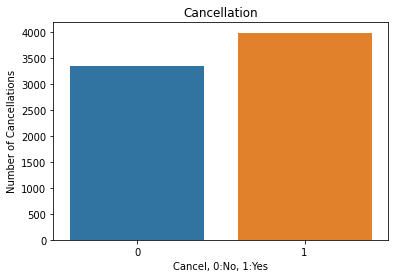

In [18]:
sns.countplot(x="is_canceled", data = df)
plt.title("Cancellation")
plt.xlabel("Cancel, 0:No, 1:Yes")
plt.ylabel("Number of Cancellations")

Text(0, 0.5, 'Number of Stays')

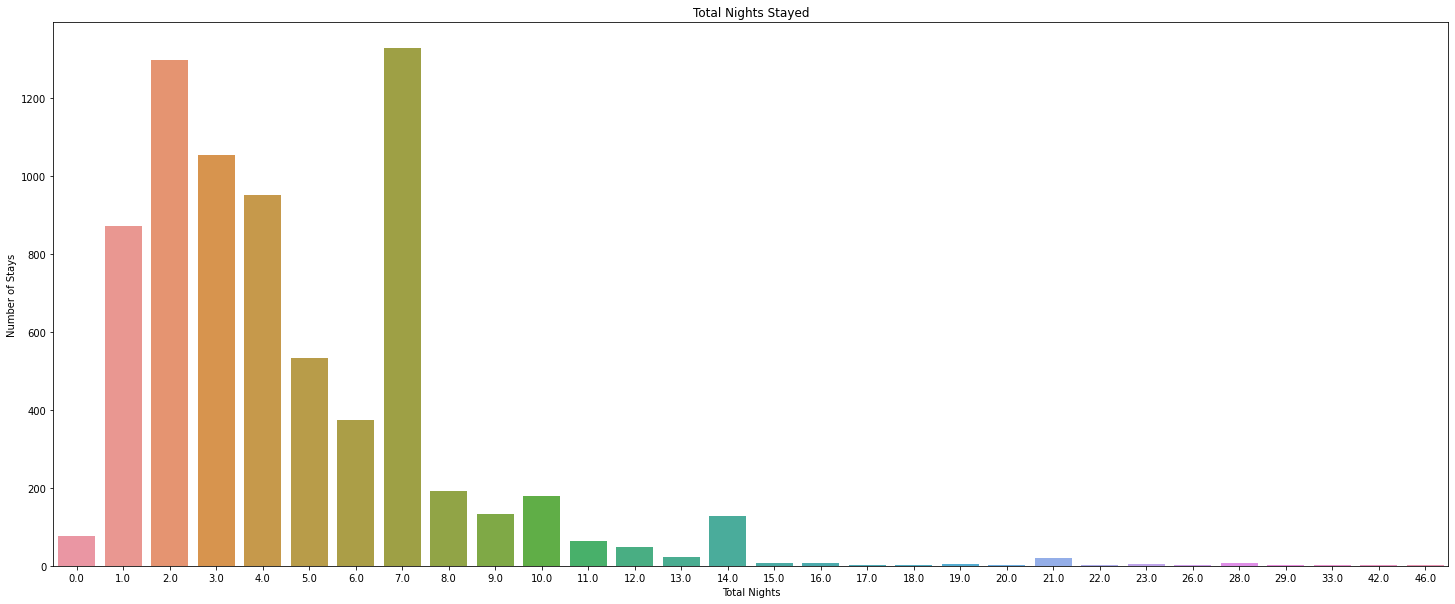

In [20]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
plt.figure(figsize=(25,10))
sns.countplot(x= "total_nights", data = df)
plt.title('Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Number of Stays')

In [21]:
top_countries = df["country"].value_counts().nlargest(10).astype(int)

In [22]:
top_countries.index

Index(['PRT', 'GBR', 'ESP', 'DEU', 'IRL', 'FRA', 'POL', 'NLD', 'CN', 'USA'], dtype='object')

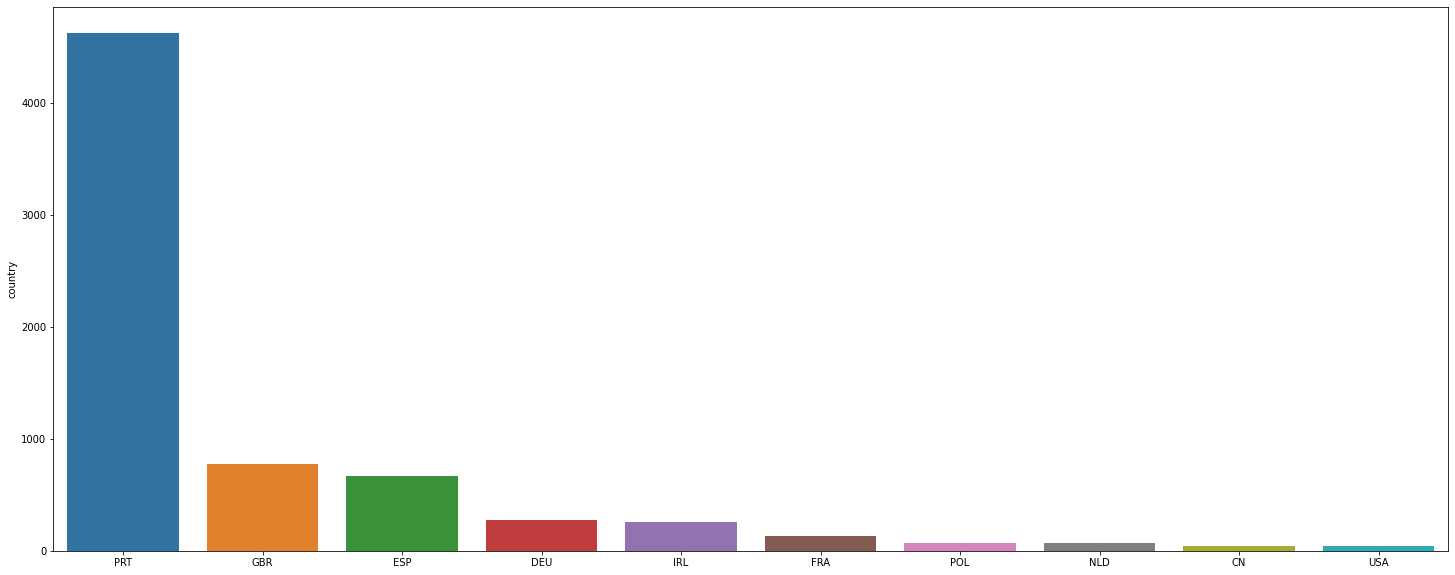

In [23]:
plt.figure(figsize=(25,10))
sns.barplot(x=top_countries.index, y=top_countries, data=df)

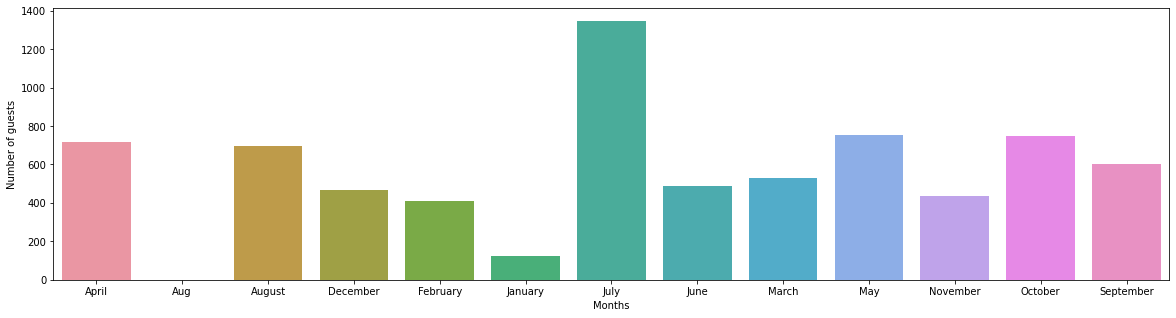

In [24]:
plt.figure(figsize=(20,5))
grouped_month = df.groupby("arrival_date_month")["hotel"].count()
months = grouped_month.index

sns.barplot(x=months, y=grouped_month)
plt.xlabel("Months")
plt.ylabel("Number of guests")
plt.show()
